In [1]:
import matplotlib
%matplotlib inline

import numpy as np, matplotlib as mpl
from pandas import DataFrame
import PreFRBLE
from PreFRBLE.convenience import *
from PreFRBLE.estimate_redshift import *
from PreFRBLE.plot import *
from PreFRBLE.likelihood import *
from PreFRBLE.physics import *
from PreFRBLE.file_system import file_estimated_redshifts_DM


## Estimate host redshift
Here we infer the host redhisft of unlocalized FRBs based on their DM.
We start with verifying our results with the localized Spitler burst FRB121102 and then infer redshifts of all FRBs in FRBcat observed by ASKAP, CHIME or Parkes

In [2]:
## benchmark scenario that realistically accounts for intervening galaxies along the LoS
from PreFRBLE.Scenario import scenario_benchmark as scenario

file_tex_redshifts_DM = root_results+"table_redshifts_DM.tex"

### estimate redshift of Spitler Burst
Here we show in detail the full exemplary redshift estimate for the Spitler burst FRB121102. From likelihood $L(\text{DM}_{\rm EG}|z)$, we obtain $L(\text{DM}_{\rm EG}|z)$ for different redshifts to produce the observed extragalactic component $\text{DM}_{\rm EG} = \text{DM}_{\rm obs} - \text{DM}_{\rm MW}$.
According to Bayes theorem
$$
P(M|O) \propto L(O|M)\pi(M),
$$
$L(\text{DM}_{\rm EG}|z)$ has to be multiplied by the prior of host redshift $\pi(z)$, that we obtain with FRBpoppy (see _notebooks/model/Gardneier20.ipynb_), in order to account for the history of source, telescope selection effects and, most importantly, the increase of probed volume with distance.
The expected value and shape of posterior $P(z|\rm DM_{EG}$ provides an estimate on the host redshift as well as upper and possibly lower limits, which are suitable to estimate the redshift distribution of unlocalized FRBs.

/data/prefrble/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/LikelihoodFunction.py:176: RuntimeWarning: divide by zero encountered in power
  self.dev =  ( self.Probability()*N )**-0.5


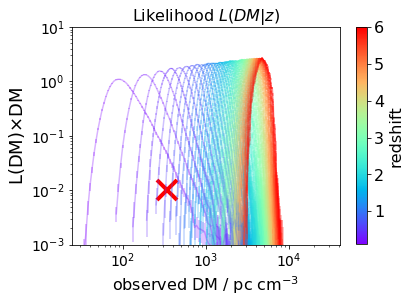

/data/prefrble/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/LikelihoodFunction.py:176: RuntimeWarning: divide by zero encountered in power
  self.dev =  ( self.Probability()*N )**-0.5


1.0


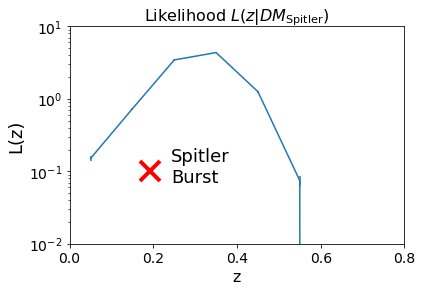

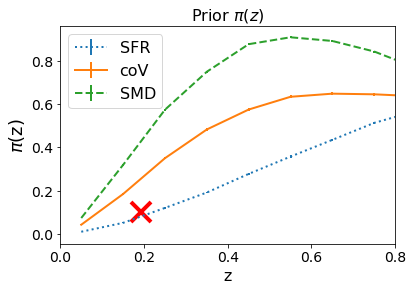

/data/prefrble/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/LikelihoodFunction.py:176: RuntimeWarning: divide by zero encountered in power
  self.dev =  ( self.Probability()*N )**-0.5


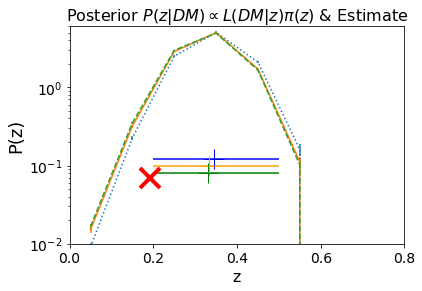

In [4]:
## Spitler burst,  Tendulkar et al. 2017
redshift_spitler = 0.19273
DM_total_spitler = 558 # pc cm^-3, total
DM_spitler = 340 # pc cm^-3, extragalactic = total-MW

sigma=1

telescope='Parkes'  #ARECIBO, actually  !!! PROVIDE prior vor ARECIBO

spitler_kwargs = {'color':'red',  'marker':'x', "markersize":20, 'markeredgewidth':4}

## L(DM|z) evolution with DM-marker
PlotLikelihoodEvolution( measure='DM', scenario=scenario, alpha=0.3 )
plt.plot( DM_spitler, 1e-2, **spitler_kwargs )
plt.title(r"Likelihood $L(DM|z)$", fontsize=16)
plt.loglog()
plt.ylim(1e-3,10)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

## L(z|DM) for flat prior with z-Marker
tmp = Scenario( population='flat', telescope='None', **scenario.Properties( identifier=False ) )

L = LikelihoodRedshiftMeasure( measure='DM', data=DM_spitler, scenario=tmp, prior=False, renormalize=True )
L.Plot( density=True )
print(L.Norm())
#Ps, z = LikelihoodRedshift( DMs=[DM_spitler], population='flat', telescope='None', scenario=scenario )
#PlotLikelihood(x=z, P=Ps[0], measure='z', density=False)
plt.xscale('linear')
plt.yscale('log')
plt.plot( redshift_spitler, 1e-1, **spitler_kwargs )
plt.title(r"Likelihood $L(z|DM_{\rm Spitler})$", fontsize=16)
plt.text( redshift_spitler+0.05, 7e-2, 'Spitler\nBurst', fontsize=18 )
plt.xlim(0,.8)
plt.ylim(1e-2,1e1)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()


## pi(z) priors with z-Marker
fig, ax = plt.subplots()
for population, linestyle in zip( populations, linestyles_population ):
    Lz = GetLikelihood( 'z', Scenario( population=population, telescope=telescope) )
    Lz.Plot( linestyle=linestyle, ax=ax, linewidth=2, label=population, density=True )
#    PlotLikelihood(x=z, P=P, measure='z', linestyle=linestyle, ax=ax, linewidth=2, label=population, density=False)
ax.set_title("Prior $\pi(z)$", fontsize=16)
ax.set_xlim(0,0.8)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.legend(fontsize=16)
ax.plot( redshift_spitler, 0.1, **spitler_kwargs )
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()


##  P(z|DM) ~ L(z|DM)*pi(z) with additional estimated z-Marker
fig, ax = plt.subplots()
colors = ['green','orange','blue']
shift=list(0.8+np.arange(len(populations))/5)
for population, linestyle in zip( populations, linestyles_population ):
    tmp = Scenario( population=population, telescope=telescope, **scenario.Properties( identifier=False) )
    Ls = LikelihoodRedshiftMeasures( measure='DM', datas=[DM_spitler], scenario=tmp, prior=True, renormalize=True )
    L = Ls[0]
    L.PlotExpectation( y=1e-1*shift.pop(), ax=ax, marker='+', markersize=20, color=colors.pop() )
    L.Plot( linestyle=linestyle, ax=ax, density=True )
#    est, dev = L.Expectation( sigma=sigma )
#    Ps, z = LikelihoodRedshift( DMs=[DM_spitler], population=population, telescope=telescope, scenario=scenario )
#    PlotLikelihood(x=z, P=Ps[0], measure='z', linestyle=linestyle, ax=ax, density=False)
#    est, dev = Likelihood2Expectation( x=z, P=Ps[0], log=False, density=True, sigma=sigma )
#    ax.errorbar( est, 1e-2*shift.pop(), xerr=dev, marker='+', markersize=20, color=colors.pop() )
    
ax.set_title(r"Posterior $P(z|DM) \propto L(DM|z) \pi(z)$ & Estimate", fontsize=16)
ax.set_xscale('linear')
ax.set_yscale('log')
ax.plot( redshift_spitler, 7e-2, **spitler_kwargs )
#ax.set_ylabel(r"$P(z)\Delta z$")
ax.set_xlim(0,0.8)
ax.set_ylim(1e-2,6)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()




All this can be done in a single line by calling

In [9]:
est, dev = RedshiftEstimate( DM_spitler, tmp, deviation=True, sigma=3 )
print( "z = {} - {} + {}".format( est, dev[0][0], dev[1][0] ) )

z = 0.3313891390506023 - 0.3313891390506023 + 0.2686108609493978


/data/prefrble/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/LikelihoodFunction.py:176: RuntimeWarning: divide by zero encountered in power
  self.dev =  ( self.Probability()*N )**-0.5


### Estimate redshifts in FRBcat
Here we estimate redshift of all FRBs listed in FRBcat following the procedure above.
Results are written to a numpy array for later use as well as latex table for presentation of results.

In [21]:
### 

sigma = 3  ## indicate order of sigma deviation to be obtained for <z>, choose >= 3 for lower limits

plot=True

redshift_estimates, deviations, teles = [], [], []

with open( file_tex_redshifts_DM, 'w' ) as f:

    ## prepare header for latex tabular
    f.write( R"\begin{tabular}{l|c|c|c|c|c|c}" )
    f.write( "\n\t")
#    f.write( R"ID & $\DMobs$ / $\unitDM$  & $\DMMW$ / $\unitDM$ & $z_{\rm SMD}(\DM)$  & $z_{\rm SFR}(\DM)$ & $z_{\rm coV}(\DM)$ \\" )
    f.write( R"ID & $\DMobs$ / $\unitDM$  & $\DMMW$ / $\unitDM$" )
    f.write( R"".join( [ R" & $z_{{\rm {0}}}(\DM)$ ".format(pop) for pop in populations] ) )
    f.write( R"\\")                    
 
    ## load FRBs from FRBcat
    FRBs = GetFRBcat(telescopes=telescopes)

    for FRB in FRBs:
        ## estimate redshift of FRBs based on extragalactic DM, considering all populations and selection effects of the detecting telescope
        
        telescope = telescopes_FRBcat_inv[FRB['tele']]

        
        ests, devs = [], []
        no_limit = False
        for population in populations:
            tmp = Scenario( telescope=telescope, population=population, **scenario.Properties( identifier=False) )
            est, dev = RedshiftEstimate( DM=FRB['DM']-FRB['DM_gal'], scenario=tmp, deviation=True, sigma=sigma )
            ests.append(est)
            devs.append(dev)
            ## check whether estimate provides a lower limit, otherwise, do not consider for output
            if np.isnan(est) or est - dev[0] <= 0:
                no_limit = True
                break
        if no_limit: continue
        
#        ests, devs = RedshiftEstimates( plot=False, DM=FRB['DM']-FRB['DM_gal'], telescope=telescopes_FRBcat_inv[FRB['tele']], scenario=scenario, sigma=sigma )
        
        ## only if redshift can be estimated    some have too low DM and can hence not be located in far Universe. These need to be investigated with the constrained simulation
        ## and only if lower limit is > 0
        if not np.any(np.isnan(ests)):
            ##  collect the FRB and write entry to tabular
            redshift_estimates.append( ests )
            deviations.append( devs )
            teles.append( telescope )
#            if ests[0] > 0.15:  ## only write down FRBs with reasonable redshift estimates, lowest two bins are z=[0.1,0.2], so nothing below .15 can deliver lower limits
            f.write( "\n\t")
            f.write( R"%s & %.1f & %.1f & $%.2f _{-%.2f} ^{+%.2f}$ & $%.2f _{-%.2f} ^{+%.2f}$ & $%.2f _{-%.2f} ^{+%.2f}$ \\" % ( FRB['ID'], FRB['DM'], FRB['DM_gal'], ests[0], devs[0][0], devs[0][1], ests[1], devs[1][0], devs[1][1], ests[2], devs[2][0], devs[2][1] ) )

    ## close tabular
    f.write( "\n")
    f.write( R"\end{tabular}" )

## write redshift estimates to npy file for later use. can be read with GetEstimatedRedshifts
redshift_estimates = np.array(redshift_estimates)
deviations = np.array(deviations)
names = ['redshift/SFR','dev-/SFR', 'dev+/SFR', 'redshift/coV','dev-/coV', 'dev+/coV', 'redshift/SMD','dev-/SMD', 'dev+/SMD', 'telescope']
formats = ['f','f','f','f','f','f','f','f','f','S']
dtype = np.dtype( {'names':names, 'formats':formats})
columns = [ redshift_estimates[:,0], deviations[:,0,0], deviations[:,0,1], redshift_estimates[:,1], deviations[:,1,0], deviations[:,1,1], redshift_estimates[:,2], deviations[:,2,0], deviations[:,2,1], teles ]


a = DataFrame()
for name, data in zip( names, columns ):
    a[name] = data
    
a.to_csv( file_estimated_redshifts_DM, index=False )

#a = np.array( list(zip( *columns )), dtype=dtype )
#np.savetxt( file_estimated_redshifts_DM, a )

#redshift_estimates = np.array(redshift_estimates)
#redshift_estimates.tofile( file_estimated_redshifts_DM, sep=' ')



/data/prefrble/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/LikelihoodFunction.py:176: RuntimeWarning: divide by zero encountered in power
  self.dev =  ( self.Probability()*N )**-0.5
